<a href="https://colab.research.google.com/github/Daniela-DiazG/first_steps_python/blob/main/Diaz_Daniela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evidencia de aprendizaje Clases, Objetos y archivos de datos en Python

---


### Analítica de datos


#### Realizado por: Daniela Diaz Gomez

Ingenieria de software y datos

Institución Universitaria Digital de Antioquia

 **1. Crear una IU que grafique un número arbitrario de polinomios de la forma ax^n donde 𝑎 y n son parámetros. Investiga sobre el operador de desempacado * y explica su uso en tu implementación.**



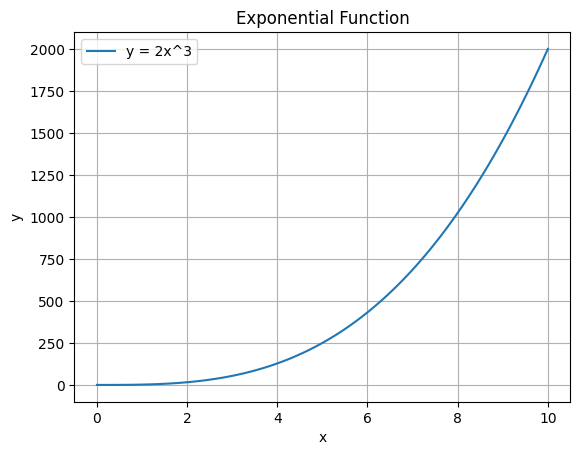

In [ ]:
# Importamos la biblioteca matplotlib para graficar y numpy para cálculos numéricos
import matplotlib.pyplot as plt
import numpy as np

# Definimos una función que representa una función exponencial del tipo y = a * x^n
def exponential(x, a, n):
    y = a * x**n
    return y

# Definimos una función que grafica la función exponencial usando parámetros a y n
def graph_exponential(a, n):
    # Generamos 100 valores equiespaciados de x entre 0 y 10
    x = np.linspace(0, 10, 100)

    # Graficamos la función exponencial evaluada con los parámetros a=2, n=3
    plt.plot(x, exponential(x, a, n), label=f'y = {a}x^{n}')

    # Etiquetas de los ejes
    plt.xlabel('x')
    plt.ylabel('y')

    # Título del gráfico
    plt.title('Exponential Function')

    # Mostramos la cuadrícula para facilitar la lectura del gráfico
    plt.grid(True)

    # Mostramos la leyenda que describe la curva graficada
    plt.legend()

    # Mostramos el gráfico
    plt.show()

# Creamos una lista con los valores de los parámetros a y n
graph_data = [2, 3]

# Llamamos a la función graph_exponential, desempaquetando los elementos de la lista como argumentos individuales
graph_exponential(*graph_data)

El operador de desempaquetado en Python (* para iterables y ** para diccionarios) se utiliza para extraer elementos de estructuras de datos como listas, tuplas o diccionarios, y pasarlos como argumentos individuales a una función o asignarlos a variables de manera más concisa.

En el caso de iterables como listas o tuplas, el operador * permite que sus elementos se expandan y se traten como argumentos separados.

En el código anterior, se usó el operador de desempaquetado * para pasar los elementos del arreglo graph_data como argumentos individuales a la función graph_exponential. De esta forma, se evita tener que referirse manualmente a cada elemento de la lista, haciendo el código más limpio y flexible.

**2. Escribe un script que guarde una lista de listas en un archivo llamado frutas.csv**

In [ ]:
# Importamos el módulo csv, que permite leer y escribir archivos CSV fácilmente
import csv

# Definimos una lista de listas, donde cada sublista representa una fruta con sus características: nombre, color y sabor
frutas = [
    ["Manzana", "Roja", "Dulce"],
    ["Plátano", "Amarillo", "Dulce"],
    ["Lima", "Verde", "Ácida"]
]

# Definimos los encabezados (headers) para las columnas del archivo CSV
headers = ["fruta", "color", "sabor"]

# Abrimos (o creamos) un archivo llamado 'frutas.csv' en modo escritura ('w')
# El parámetro newline="" evita que se agreguen líneas en blanco adicionales en algunos sistemas operativos
with open("frutas.csv", "w", newline="") as file:
    # Creamos un objeto escritor CSV que nos permite escribir filas en el archivo
    writer = csv.writer(file)

    # Escribimos la primera fila con los encabezados de las columnas
    writer.writerow(headers)

    # Escribimos varias filas a la vez, correspondientes a las frutas
    writer.writerows(frutas)

**3. Escribe un script que lea los datos del archivo frutas.csv**

In [ ]:
# Creamos una lista vacía donde almacenaremos los datos leídos del archivo CSV
datos_frutas = []

# Abrimos el archivo 'frutas.csv' en modo lectura ('r')
with open("frutas.csv", "r") as file:
    # Creamos un lector CSV para recorrer el contenido del archivo
    reader = csv.reader(file)

    # Usamos next(reader) para omitir la primera fila (los encabezados)
    next(reader)

    # Iteramos sobre cada fila restante del archivo (una lista por cada fruta)
    for row in reader:
        # Agregamos cada fila leída a la lista 'datos_frutas'
        datos_frutas.append(row)

# Mostramos la lista con los datos de las frutas leídos desde el archivo
datos_frutas

[['Manzana', 'Roja', 'Dulce'],
 ['Plátano', 'Amarillo', 'Dulce'],
 ['Lima', 'Verde', 'Ácida']]

**4. Inventar tu propia pipeline de acciones en python sobre el conjunto de datos de tu preferencia en la plataforma**


In [ ]:
# Importamos el módulo json para trabajar con datos en formato JSON
import json

# Importamos la biblioteca requests para hacer solicitudes HTTP
import requests

# Definimos la URL de una API pública que proporciona datos de prueba en formato JSON
# En este caso decidimos usar albums
url = "https://jsonplaceholder.typicode.com/albums"

# Hacemos una solicitud GET a la URL y guardamos la respuesta en la variable 'respuesta_api'
respuesta_api = requests.get(url)

# Convertimos el contenido de la respuesta (en texto JSON) a una estructura de datos de Python (una lista de diccionarios)
albums = json.loads(respuesta_api.text)

# Mostramos los primeros 5 elementos de la lista de álbumes obtenidos desde la API
print("primeros albums:", albums[0:5])

primeros albums: [{'userId': 1, 'id': 1, 'title': 'quidem molestiae enim'}, {'userId': 1, 'id': 2, 'title': 'sunt qui excepturi placeat culpa'}, {'userId': 1, 'id': 3, 'title': 'omnis laborum odio'}, {'userId': 1, 'id': 4, 'title': 'non esse culpa molestiae omnis sed optio'}, {'userId': 1, 'id': 5, 'title': 'eaque aut omnis a'}]


In [ ]:
# Definimos una función que agrupa los álbumes por el ID del usuario
def get_albums_by_user(albums):

    # Creamos un diccionario vacío para almacenar los álbumes agrupados por usuario
    albums_by_user = {}

    # Recorremos cada álbum en la lista
    for album in albums:

        # Obtenemos el ID del usuario
        user_id = album['userId']

        # Si el usuario aún no está en el diccionario, creamos una nueva entrada con una lista vacía
        if user_id not in albums_by_user:
            albums_by_user[user_id] = []

        # Agregamos el álbum actual a la lista correspondiente del usuario
        albums_by_user[user_id].append(album)

    # Devolvemos el diccionario con los álbumes agrupados
    return albums_by_user


# Llamamos a la función usando la lista de álbumes obtenida de la API
albums_agrupados = get_albums_by_user(albums)


# Imprimimos los titulos de los álbumes correspondientes al usuario con ID 10
print("\nTítulos de álbumes del usuario 10:")
for album in albums_agrupados.get(10, []):
    print(f"- {album['title']}")


Títulos de álbumes del usuario 10:
- repellendus praesentium debitis officiis
- incidunt et et eligendi assumenda soluta quia recusandae
- nisi qui dolores perspiciatis
- quisquam a dolores et earum vitae
- consectetur vel rerum qui aperiam modi eos aspernatur ipsa
- unde et ut molestiae est molestias voluptatem sint
- est quod aut
- omnis quia possimus nesciunt deleniti assumenda sed autem
- consectetur ut id impedit dolores sit ad ex aut
- enim repellat iste


In [ ]:
# Definimos una función que ordena los usuarios según la cantidad de álbumes que tienen

def sort_albums_by_user_count(albums_agrupados):

    # Obtenemos los pares (user_id, lista_de_albums) del diccionario
    items = albums_agrupados.items()

    # Ordenamos los pares por la longitud de la lista de álbumes (de menor a mayor)
    sorted_items = sorted(items, key=lambda item: len(item[1]))

    # Retornamos la lista de tuplas ordenadas
    return sorted_items

In [ ]:
albums_ordenados_por_cantidad = sort_albums_by_user_count(albums_agrupados)

# Imprime los resultados ordenados
print("\nÁlbumes por usuario ordenados por cantidad:")
for user_id, albums_list in albums_ordenados_por_cantidad:
    print(f"User ID: {user_id}, Cantidad de álbumes: {len(albums_list)}")


Álbumes por usuario ordenados por cantidad:
User ID: 1, Cantidad de álbumes: 10
User ID: 2, Cantidad de álbumes: 10
User ID: 3, Cantidad de álbumes: 10
User ID: 4, Cantidad de álbumes: 10
User ID: 5, Cantidad de álbumes: 10
User ID: 6, Cantidad de álbumes: 10
User ID: 7, Cantidad de álbumes: 10
User ID: 8, Cantidad de álbumes: 10
User ID: 9, Cantidad de álbumes: 10
User ID: 10, Cantidad de álbumes: 10
